In [1]:
!pip install -q ultralytics roboflow opencv-python matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 137.1 MB/s eta 0:00:00


In [2]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


CUDA available: True
GPU: Tesla T4


In [8]:
from roboflow import Roboflow

rf = Roboflow(api_key="6WkkoBPh8ug7upBDzwab")
project = rf.workspace("xray-u9rf3").project("wsiroisimages")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wsiroisImages-1 in yolov8:: 100%|██████████| 3767/3767 [00:00<00:00, 10578.57it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [21]:
import os

base = "/content/wsiroisImages-1"

for split in ["train", "valid"]:
    img_dir = f"{base}/{split}/images"
    print(split, "images:", len(os.listdir(img_dir)))


train images: 1503
valid images: 376


In [20]:
!ls /content
!ls /content/wsiroisImages-1
!ls /content/wsiroisImages-1/train





sample_data  wsiroisImages-1
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid
images	labels


In [23]:
from ultralytics import YOLO

# Load pretrained YOLOv8 nano
model = YOLO("yolov8n.pt")

# Train
model.train(
    data="/content/wsiroisImages-1/data.yaml",
    epochs=10,
    imgsz=512,
    batch=16,
    optimizer="AdamW",
    lr0=1e-3,
    patience=10,
    device=0,
    workers=2
)


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wsiroisImages-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspecti

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5d489a3fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [24]:
model.val()


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 501.5±112.7 MB/s, size: 14.4 KB)
val: Scanning /content/wsiroisImages-1/valid/labels.cache... 376 images, 146 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 376/376 112.6Mit/s 0.0s
val: /content/wsiroisImages-1/valid/images/TC_S01_P000113_C0001_B101_-33354-86458-34598-87564-_png.rf.0d753e9a144f7988bef3c5da25c3fedd.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 24/24 3.3it/s 7.2s
                   all        376       6661      0.648      0.546      0.606      0.368
Speed: 1.7ms preprocess, 3.3ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5d466f1670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [25]:
model.predict(
    source="/content/wsiroisImages-1/valid/images",
    conf=0.25,
    iou=0.5,
    save=True
)



image 1/376 /content/wsiroisImages-1/valid/images/100B_-35129-6567-36429-7757-_png.rf.a26ea795974dd0c1163a4030db4c0eb0.jpg: 512x512 40 lymphocytes and plasma cellss, 8.8ms
image 2/376 /content/wsiroisImages-1/valid/images/134B_-52914-12263-54149-13444-_png.rf.e8fe08ff6cb9f97f3ca65afbf1de5397.jpg: 512x512 51 lymphocytes and plasma cellss, 6.2ms
image 3/376 /content/wsiroisImages-1/valid/images/136B_-73791-8482-75066-9666-_png.rf.29577c350bb72a83e5ffab52e731648f.jpg: 512x512 6 lymphocytes and plasma cellss, 6.3ms
image 4/376 /content/wsiroisImages-1/valid/images/154B_-2199-20514-3357-21703-_png.rf.979afcfb4e96071f0d22c8c281bf7c09.jpg: 512x512 22 lymphocytes and plasma cellss, 5.8ms
image 5/376 /content/wsiroisImages-1/valid/images/181S_-34272-32152-35623-33367-_png.rf.81fad14b01921f6438f35341683677d3.jpg: 512x512 4 lymphocytes and plasma cellss, 6.1ms
image 6/376 /content/wsiroisImages-1/valid/images/196S_-7964-15811-9098-16894-_png.rf.38389b4e867383f829a2aa6bc5c3fffd.jpg: 512x512 (no d

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lymphocytes and plasma cells'}
 obb: None
 orig_img: array([[[238, 226, 246],
         [233, 221, 241],
         [165, 150, 171],
         ...,
         [211, 173, 209],
         [233, 197, 233],
         [185, 149, 185]],
 
        [[230, 218, 238],
         [231, 219, 239],
         [183, 168, 189],
         ...,
         [180, 144, 180],
         [200, 164, 200],
         [222, 189, 224]],
 
        [[235, 221, 239],
         [235, 221, 239],
         [201, 187, 205],
         ...,
         [185, 151, 188],
         [170, 136, 173],
         [212, 179, 216]],
 
        ...,
 
        [[191, 173, 190],
         [228, 210, 227],
         [239, 217, 236],
         ...,
         [204, 169, 213],
         [206, 171, 215],
         [199, 164, 208]],
 
        [[182, 166, 183],
         [236, 220, 237],
         [235, 215, 234],
         .

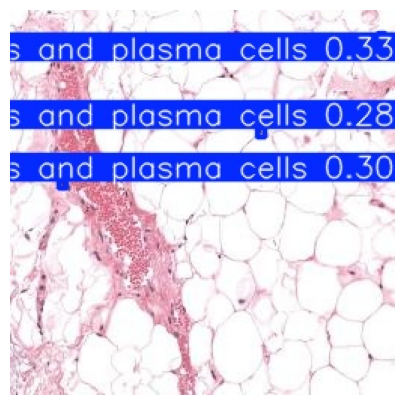

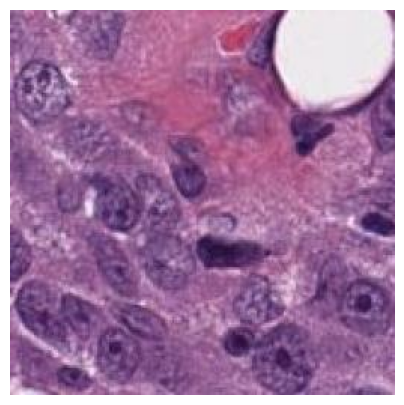

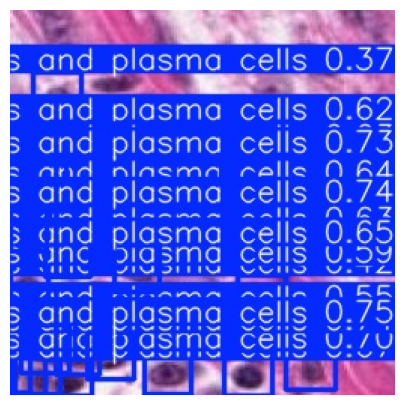

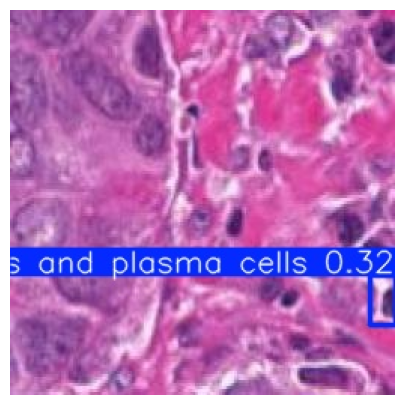

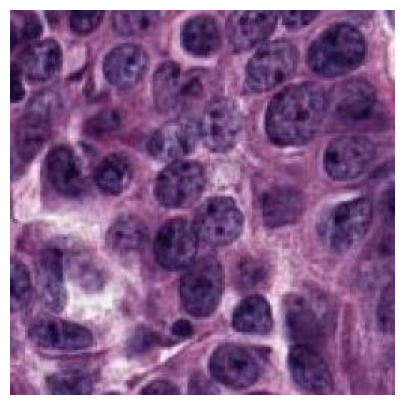

In [26]:
import cv2, glob, matplotlib.pyplot as plt

imgs = glob.glob("runs/detect/predict/*.jpg")[:5]

for img in imgs:
    im = cv2.imread(img)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.axis("off")
